# Exploration of the IMDB dataset

The dataset is originally from http://ai.stanford.edu/~amaas/data/sentiment/


In [13]:
%matplotlib inline

In [1]:
from __future__ import print_function

from keras.datasets import imdb

import cPickle as pickle
import os.path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

Using TensorFlow backend.


In [2]:
max_features = 20000

# To work around bug in latest version of the dataset in Keras,
# load older version manually, downloaded from 
# https://s3.amazonaws.com/text-datasets/imdb_full.pkl
print('Loading data...')
path = os.path.expanduser('~/.keras/datasets/imdb_full.pkl')
f = open(path, 'rb')
(x_train, y_train), (x_test, y_test) = pickle.load(f)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [3]:
# what does the data look like?
x_train[0]

[23022,
 309,
 6,
 3,
 1069,
 209,
 9,
 2175,
 30,
 1,
 169,
 55,
 14,
 46,
 82,
 5869,
 41,
 393,
 110,
 138,
 14,
 5359,
 58,
 4477,
 150,
 8,
 1,
 5032,
 5948,
 482,
 69,
 5,
 261,
 12,
 23022,
 73935,
 2003,
 6,
 73,
 2436,
 5,
 632,
 71,
 6,
 5359,
 1,
 25279,
 5,
 2004,
 10471,
 1,
 5941,
 1534,
 34,
 67,
 64,
 205,
 140,
 65,
 1232,
 63526,
 21145,
 1,
 49265,
 4,
 1,
 223,
 901,
 29,
 3024,
 69,
 4,
 1,
 5863,
 10,
 694,
 2,
 65,
 1534,
 51,
 10,
 216,
 1,
 387,
 8,
 60,
 3,
 1472,
 3724,
 802,
 5,
 3521,
 177,
 1,
 393,
 10,
 1238,
 14030,
 30,
 309,
 3,
 353,
 344,
 2989,
 143,
 130,
 5,
 7804,
 28,
 4,
 126,
 5359,
 1472,
 2375,
 5,
 23022,
 309,
 10,
 532,
 12,
 108,
 1470,
 4,
 58,
 556,
 101,
 12,
 23022,
 309,
 6,
 227,
 4187,
 48,
 3,
 2237,
 12,
 9,
 215]

Hmm. That doesn't look like a movie review! The words are replaced by indexes. Let's convert that review back to text.

In [4]:
word2index = imdb.get_word_index()

In [5]:
word2index.items()[:5]

[(u'fawn', 34701),
 (u'tsukino', 52006),
 (u'nunnery', 52007),
 (u'sonja', 16816),
 (u'vani', 63951)]

In [6]:
# we want the other direction
index2word = dict([(i,w) for (w,i) in word2index.items()])

In [30]:
print('\n'.join([index2word[i] for i in range(1,20)]))

the
and
a
of
to
is
br
in
it
i
this
that
was
as
for
with
movie
but
film


Note that words are indexed in descending order of frequency. This means we can remove words with high index if we want to reduce the vocab size.

In [9]:
def totext(review):
    return ' '.join(index2word[i] for i in review)

for review in x_train[:10]:
    # let's look at the first 30 words
    print(totext(review[:30]))
    print('\n')

bromwell high is a cartoon comedy it ran at the same time as some other programs about school life such as teachers my 35 years in the teaching profession lead


homelessness or houselessness as george carlin stated has been an issue for years but never a plan to help those on the street that were once considered human who did


brilliant over acting by lesley ann warren best dramatic hobo lady i have ever seen and love scenes in clothes warehouse are second to none the corn on face is


this is easily the most underrated film inn the brooks cannon sure its flawed it does not give a realistic view of homelessness unlike say how citizen kane gave a


this is not the typical mel brooks film it was much less slapstick than most of his movies and actually had a plot that was followable leslie ann warren made


this isn't the comedic robin williams nor is it the quirky insane robin williams of recent thriller fame this is a hybrid of the classic drama without over dramatization mixed


yes 

In [10]:
# what about labels?
y_train[1]

1

In [11]:
# how many labels?
np.unique(y_train)

array([0, 1])

In [26]:
# label balance
np.unique(y_train, return_counts=True)

(array([0, 1]), array([12500, 12500]))

Evenly balanced between positive (we could also have read this in the docs, but it's good to confirm :)

How long are the reviews?

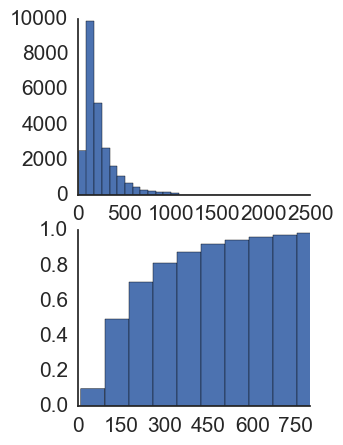

In [25]:
lengths = map(len, x_train)
fig, axs = plt.subplots(2,1, figsize=(3,5))
axs[0].hist(lengths, bins=30)
axs[1].hist(lengths, bins=30, cumulative=True, normed=True)
axs[1].set_xlim([0,800])
axs[1].set_xticks(range(0,800,150))

sns.despine(fig)

We'll want to truncate long reviews and pad short ones to the same length. 300-500 seems like a reasonable option to keep most of the data.